In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import roc_curve, auc,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.functional as F
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torch.utils.data as Data
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [14]:
data=pd.read_csv("C:/Users/www27/Desktop/机器学习/Microsoft Dataset.csv")
dt=data.copy()
dt.set_index('Date', inplace=True)
# 将日期列转换为时间索引
dt.index = pd.to_datetime(dt.index)

# 使用 resample 函数将数据转换为以月为单位，并计算每个月的平均值
dt_qly = dt.resample('Q').mean()
dt=dt_qly.copy()
# Y=dt.iloc[:,-1]
ss1=StandardScaler()
# ss2=StandardScaler()
dt=ss1.fit_transform(dt)
# Y=ss2.fit_transform(Y.to_numpy().reshape(-1, 1))
X=pd.DataFrame(dt)
# residuals = model_fit.resid
# print(residuals)
# dt=X.copy()
# X.iloc[:,-1]=residuals

In [15]:

# Y=dt.iloc[:,-1]
ss1=StandardScaler()
# ss2=StandardScaler()
dt=ss1.fit_transform(dt)
# Y=ss2.fit_transform(Y.to_numpy().reshape(-1, 1))
X=pd.DataFrame(dt)

In [16]:
X

,0,1,2,3,4,5
0,-0.650130,-0.650700,-0.649738,-0.650186,-0.586969,4.205075
1,-0.649989,-0.650571,-0.649590,-0.650051,-0.586885,-1.686303
2,-0.650060,-0.650644,-0.649664,-0.650125,-0.586931,-1.795765
3,-0.649560,-0.650131,-0.649161,-0.649613,-0.586615,-0.224020
4,-0.648327,-0.648862,-0.647953,-0.648358,-0.585840,1.407744
...,...,...,...,...,...,...
149,2.900156,2.901887,2.907583,2.906412,2.937915,-1.294654
150,3.107095,3.104316,3.105621,3.099785,3.137312,-1.407366
151,3.383397,3.378967,3.391693,3.389107,3.433083,-1.363566
152,3.942000,3.932233,3.951985,3.944105,3.994253,-1.488338


In [12]:
model = pm.auto_arima(X.iloc[:,-1], 
                      start_p=0, start_q=0, 
                      max_p=5, max_q=5, 
                      seasonal=False,
                      stepwise=True,
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=369.304, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=365.509, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=329.465, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=367.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=325.098, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=319.479, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=352.122, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=319.945, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=319.554, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=323.166, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=339.536, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=321.553, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=320.767, Time=0.06 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 1.189 seconds


In [17]:
model = ARIMA(X.iloc[:,-1], order=(2, 1, 1), trend='t')
model_fit = model.fit()

0     -0.015537
1      4.189538
2     -0.554066
3      0.605972
4      0.845964
         ...   
149   -1.250552
150   -1.378650
151   -1.364651
152   -1.333449
153   -1.420270
Length: 154, dtype: float64


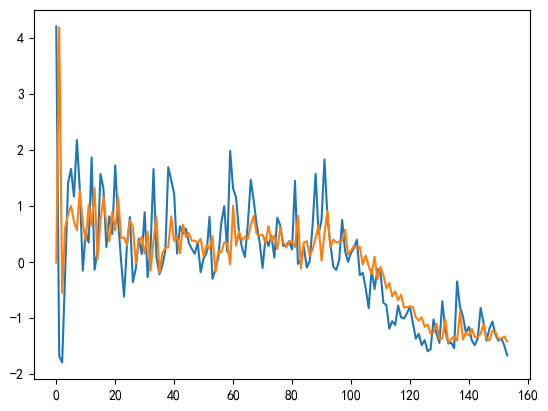

In [18]:
fitted_values = model_fit.fittedvalues
print(fitted_values)
plt.plot(X.iloc[:,-1])
plt.plot(fitted_values)

In [24]:
# 计算MSE和MAE
mse = mean_squared_error(X.iloc[:,-1], fitted_values)
mae = mean_absolute_error(X.iloc[:,-1], fitted_values)

In [26]:
print(mse,mae)

0.6370085275205505 0.4550430089580453


In [7]:
residuals = model_fit.resid
print(residuals)
dt=X.copy()
X.iloc[:,-1]=residuals

0      4.220612
1     -5.875841
2     -1.241699
3     -0.829992
4      0.561780
         ...   
149   -0.044102
150   -0.028716
151    0.001085
152   -0.154889
153   -0.249975
Length: 154, dtype: float64


In [ ]:
# 计算MSE和MAE
mse = mean_squared_error(test_data, fitted_values)
mae = mean_absolute_error(test_data, fitted_values)

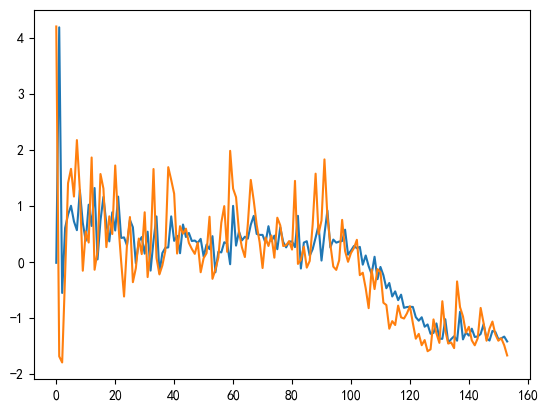

In [8]:
plt.plot(fitted_values)
plt.plot(dt.iloc[:,-1])

In [9]:
def time_xy(data,seq_length):
    x=[]
    y=[]
    print(data)
    for i in range(len(data)-seq_length): 
        _x=data[i:(i+seq_length),:]    
        _y=data[i+seq_length,-1]     
        x.append(_x)
        y.append(_y)
    x,y=np.array(x),np.array(y)
    return x,y

In [10]:
def spilt_xy(X,Y,split_ratio):    

    train_size=int(len(Y)*split_ratio)
    test_size=len(Y)-train_size

    x_data=Variable(torch.Tensor(np.array(X)).to('cuda'))
    y_data=Variable(torch.Tensor(np.array(Y)).to('cuda'))

    x_train=Variable(torch.Tensor(np.array(X[0:train_size])).to('cuda'))
    y_train=Variable(torch.Tensor(np.array(Y[0:train_size])).to('cuda'))
    y_test=Variable(torch.Tensor(np.array(Y[train_size:len(y_data)])).to('cuda'))
    x_test=Variable(torch.Tensor(np.array(X[train_size:len(x_data)])).to('cuda'))
    print('x_data.shape,y_data.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape:\n{}{}{}{}{}{}'.format(x_data.shape,y_data.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape))
    return (x_data,y_data,x_train,y_train,x_test,y_test)

In [11]:
def finish_xy(x_train,y_train,x_test,y_test):     
    num_epochs=n_iters/(len(x_train)/batch_size) # n_iters代表一次迭代
    num_epochs=int(num_epochs)
    train_dataset=Data.TensorDataset(x_train,y_train)
    test_dataset=Data.TensorDataset(x_test,y_test)
    train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=False,drop_last=True) # 加载数据集,使数据集可迭代
    test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False,drop_last=True)
    return train_loader,test_loader


In [134]:
seq_length = 3   # 时间步长
input_size = 6  # 原本为3，现在为5， 删去postcode与time
num_layers = 5 # 4
hidden_size = 128  #128 # 512??
batch_size = 16
lr =0.001     #0.001
output_size = 1
split_ratio = 0.9
moudle = Net(input_size, hidden_size, num_layers, output_size, batch_size, seq_length)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(moudle.parameters(), lr=lr)
X,Y=time_xy(X.values,seq_length)
x_data,y_data,x_train,y_train,x_test,y_test=spilt_xy(X,Y,split_ratio)
train_loader,test_loader=finish_xy(x_train,y_train,x_test,y_test)

[[-6.50130139e-01 -6.50700499e-01 -6.49737541e-01 -6.50186374e-01
  -5.86969265e-01  4.22061271e+00]
 [-6.49988784e-01 -6.50571216e-01 -6.49590038e-01 -6.50050523e-01
  -5.86885370e-01 -5.87584050e+00]
 [-6.50059691e-01 -6.50644132e-01 -6.49663996e-01 -6.50124657e-01
  -5.86931151e-01 -1.24164298e+00]
 [-6.49560407e-01 -6.50130890e-01 -6.49161448e-01 -6.49612720e-01
  -5.86615004e-01 -8.29945011e-01]
 [-6.48327026e-01 -6.48862383e-01 -6.47953085e-01 -6.48358379e-01
  -5.85840384e-01  5.61761831e-01]
 [-6.47046482e-01 -6.47597848e-01 -6.46680078e-01 -6.47110684e-01
  -5.85069868e-01  6.59153494e-01]
 [-6.47011090e-01 -6.47551252e-01 -6.46628877e-01 -6.47053492e-01
  -5.85034549e-01  4.43774387e-01]
 [-6.47040963e-01 -6.47523260e-01 -6.46761397e-01 -6.47121931e-01
  -5.85076813e-01  1.60915726e+00]
 [-6.46661362e-01 -6.47209344e-01 -6.46305837e-01 -6.46732953e-01
  -5.84836601e-01  4.69537948e-04]
 [-6.46610211e-01 -6.47173546e-01 -6.46215930e-01 -6.46662882e-01
  -5.84793328e-01 -8.5392

In [135]:
moudle.cuda()
loss_list = []
for epochs in range(800):
    for i, (batch_x, batch_y) in enumerate(train_loader):
#         print(batch_x)
        outputs = moudle(batch_x)
        optimizer.zero_grad()  
        loss = criterion(outputs, batch_y)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()
    print("Epoch: %d, loss: %1.5f" % (epochs+1, loss.item()))
    loss_list.append(loss.item())
    with torch.no_grad():  # 评估模式
        total_loss = 0
        for batch_x, batch_y in train_loader:
            outputs = moudle(batch_x)
            loss = criterion(outputs, batch_y)
            total_loss += loss.item()
        mse = total_loss / len(train_loader)
        print("Epoch: %d, MSE: %1.5f" % (epochs + 1, mse))


Epoch: 1, loss: 0.14810
Epoch: 1, MSE: 0.33805
Epoch: 2, loss: 0.11336
Epoch: 2, MSE: 0.31762
Epoch: 3, loss: 0.10338
Epoch: 3, MSE: 0.32542
Epoch: 4, loss: 0.09404
Epoch: 4, MSE: 0.33328
Epoch: 5, loss: 0.09488
Epoch: 5, MSE: 0.32901
Epoch: 6, loss: 0.09341
Epoch: 6, MSE: 0.34438
Epoch: 7, loss: 0.09494
Epoch: 7, MSE: 0.32995
Epoch: 8, loss: 0.10696
Epoch: 8, MSE: 0.32665
Epoch: 9, loss: 0.09655
Epoch: 9, MSE: 0.34678
Epoch: 10, loss: 0.14085
Epoch: 10, MSE: 0.33190
Epoch: 11, loss: 0.09660
Epoch: 11, MSE: 0.32253
Epoch: 12, loss: 0.11235
Epoch: 12, MSE: 0.34814
Epoch: 13, loss: 0.10025
Epoch: 13, MSE: 0.32496
Epoch: 14, loss: 0.08056
Epoch: 14, MSE: 0.33473
Epoch: 15, loss: 0.10302
Epoch: 15, MSE: 0.34717
Epoch: 16, loss: 0.10319
Epoch: 16, MSE: 0.33738
Epoch: 17, loss: 0.12183
Epoch: 17, MSE: 0.33768
Epoch: 18, loss: 0.10793
Epoch: 18, MSE: 0.33118
Epoch: 19, loss: 0.08681
Epoch: 19, MSE: 0.33207
Epoch: 20, loss: 0.10954
Epoch: 20, MSE: 0.32766
Epoch: 21, loss: 0.09031
Epoch: 21, MS

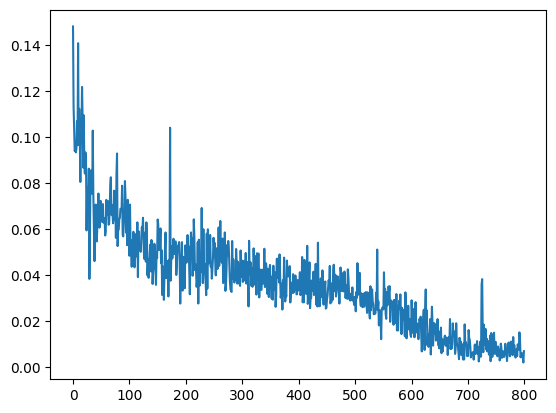

In [136]:
plt.plot(loss_list)

In [12]:
class Net(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,output_size,batch_size,seq_length) -> None:
        super(Net,self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.output_size=output_size
        self.batch_size=batch_size
        self.seq_length=seq_length
        self.num_directions=1 # 单向LSTM
        self.liner1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.tanh = nn.Tanh()
        self.liner2 = nn.Linear(hidden_size, output_size)
#         self.fc = nn.Linear(hidden_size, output_size)

        self.attention = SelfAttention(hidden_size)

        self.lstm=nn.LSTM(input_size=hidden_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True,dropout=0.2) # LSTM层

    def forward(self,x):
        batchsize = x.shape[0]

        x = self.liner1(x)
        # x = self.relu(x)
        x = self.tanh(x)

        h_0 = torch.randn(self.num_directions * self.num_layers, x.size(0), self.hidden_size).to('cuda')
        c_0 = torch.randn(self.num_directions * self.num_layers, x.size(0), self.hidden_size).to('cuda')

        output, (h_n, c_n) = self.lstm(x, (h_0, c_0)) # output(5, 30, 64)
#         output = output[:, -1, :]
#         attention_output = self.fc(output)  # 最终输出预测结果

        '''
        attention_output (batch_size, window_size, hidden_size)
        attention_output[:,-1,:] (batch_size, hidden_size)
        '''
        attention_output = self.attention(output)[:,-1,:]
        attention_output = self.dropout(attention_output)
        attention_output = self.liner2(attention_output)
        attention_output = attention_output.squeeze()
        return attention_output

class SelfAttention(nn.Module):
    def __init__(self, attention_units):
        super(SelfAttention, self).__init__()
        self.attention_units = attention_units
        self.W_query = nn.Linear(attention_units, attention_units)
        self.W_key = nn.Linear(attention_units, attention_units)
        self.W_value = nn.Linear(attention_units, attention_units)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, inputs):
        query = self.W_query(inputs)
        key = self.W_key(inputs)
        value = self.W_value(inputs)

        attention_weights = torch.matmul(query, key.transpose(-2, -1))
        attention_weights = self.softmax(attention_weights)
        attention_output = torch.matmul(attention_weights, value)

        return attention_output

In [62]:
torch.save(moudle.state_dict(), 'moudle.pth')

In [125]:
moudle = Net(input_size, hidden_size, num_layers, output_size, batch_size, seq_length)
moudle.load_state_dict(torch.load('moudle.pth'))

<All keys matched successfully>

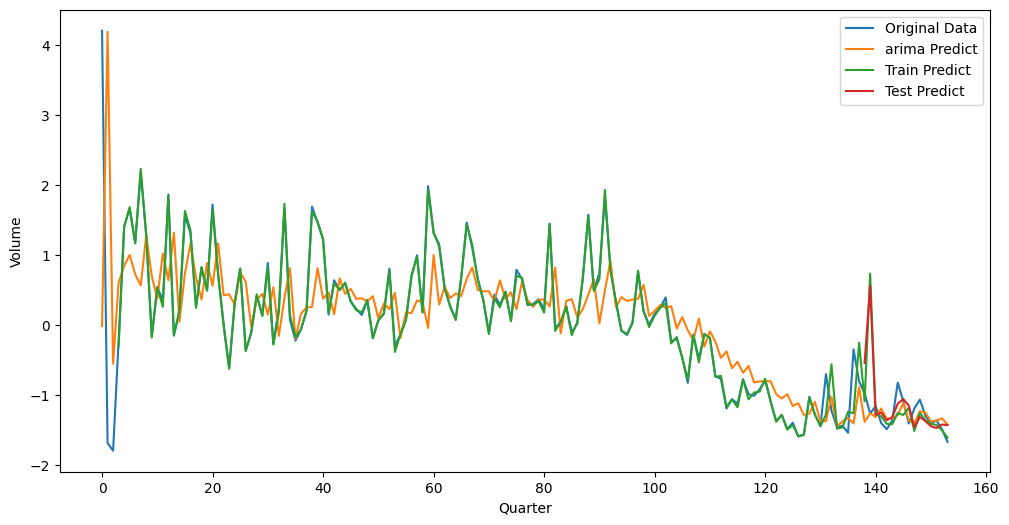

In [137]:
# 预测
moudle.eval()
train_predict = moudle(x_data).cpu().detach().numpy()
# train_predict =train_predict[:]
# train_predict = model(x_train.to(device)).cpu().detach().numpy()
test_predict = moudle(x_test).cpu().detach().numpy()

# 反归一化
# train_predict = ss2.inverse_transform(train_predict)
# y_train = ss1.inverse_transform(y_train.cpu().numpy().reshape(-1, 1))
# test_predict = ss1.inverse_transform(test_predict)
# y_test = ss1.inverse_transform(y_test.cpu().numpy().reshape(-1, 1))

# 绘制原始数据和预测数据
plt.figure(figsize=(12, 6))
plt.plot(dt.iloc[:,-1], label='Original Data')
plt.plot(np.arange(0,154), fitted_values, label='arima Predict')
plt.plot(np.arange(seq_length, len(train_predict) + seq_length), train_predict+fitted_values[3:154], label='Train Predict')
plt.plot(np.arange(len(dt)-len(test_predict) , len(dt)), test_predict+fitted_values[138:154], label='Test Predict')

plt.legend()
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.show()

In [64]:
model2 = ARIMA(dt.iloc[0:138,-1], order=(2, 1, 1), trend='t')
model2_fit = model2.fit()
forecast = model2_fit.forecast(steps=16)

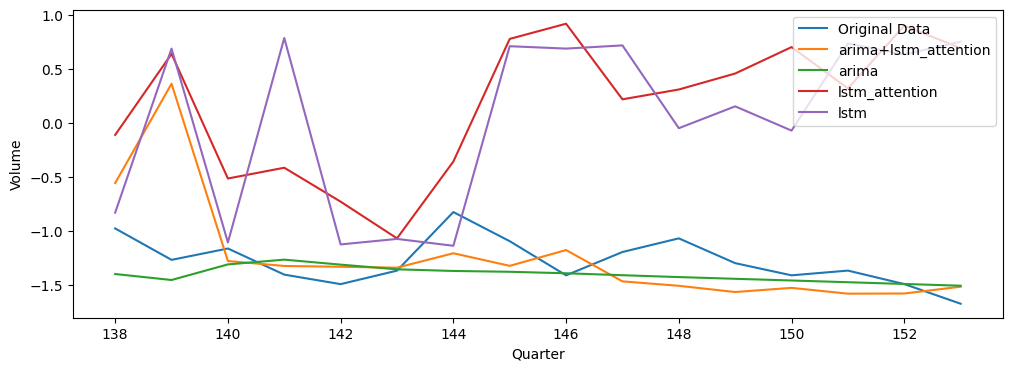

In [138]:
plt.figure(figsize=(12, 4))
plt.plot(dt.iloc[138:154,-1], label='Original Data')
plt.plot(forecast+test_predict, label='arima+lstm_attention')
plt.plot(forecast, label='arima')
plt.plot(test_predict_lstm_attention, label='lstm_attention')
plt.plot(test_predict_lstm, label='lstm')
plt.legend(loc='upper right')
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.show()

In [74]:
moudle.eval()
test_predict_lstm_attention = moudle(x_test).cpu().detach().numpy()

In [81]:
new_index = range(138, 154)
test_predict_lstm_attention = pd.DataFrame(test_predict_lstm_attention, index=new_index, columns=['value'])

In [88]:
test_predict_lstm = moudle(x_test).cpu().detach().numpy()
test_predict_lstm = pd.DataFrame(test_predict_lstm, index=new_index, columns=['value'])

In [154]:
dd=dd.iloc[:,-1]

In [155]:
dd=dd.reset_index(drop=True)

In [156]:
dd

0      -0.807060
1      -0.806803
2      -0.884875
3      -0.850669
4      -0.893439
          ...   
1627   -1.182177
1628   -1.080647
1629   -1.085915
1630   -0.748269
1631   -1.042038
Name: 5, Length: 1632, dtype: float64

In [147]:
train_predict

array([ 0.3486573 ,  0.32546052,  0.28582397, ..., -0.8810373 ,
       -0.7628858 , -0.83805794], dtype=float32)